In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
import cv2
from scipy.ndimage import gaussian_filter

In [6]:
df = pd.read_csv("gaze_tracking_2025-02-08_00-00-25.csv")

In [8]:
df.head()

,session_id,timestamp,screen_x,screen_y
0,59bbc47f,1.738991e+09,1437,567
1,59bbc47f,1.738991e+09,1471,551
2,59bbc47f,1.738991e+09,1437,556
3,59bbc47f,1.738991e+09,1437,556
4,59bbc47f,1.738991e+09,1188,645


In [18]:
root = tk.Tk()
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
root.destroy()  # Close the Tkinter window

print(f"Screen Width: {screen_width}, Screen Height: {screen_height}")

Screen Width: 1710, Screen Height: 1107


In [20]:
screen_width = 1710
screen_height = 1107

In [22]:
screen_midpoint = screen_width // 2

In [24]:
left_side_count = (df['screen_x'] < screen_midpoint).sum()
right_side_count = (df['screen_x'] >= screen_midpoint).sum()

total_time = len(df)
left_ratio = left_side_count / total_time
right_ratio = right_side_count / total_time

print(f"Left side ratio: {left_ratio:.2%}")
print(f"Right side ratio: {right_ratio:.2%}")

Left side ratio: 81.73%
Right side ratio: 18.27%


In [32]:
# labels = ['Left Side', 'Right Side']
# values = [left_ratio, right_ratio]

# plt.bar(labels, values)
# plt.ylabel('Percentage of Time Spent')
# plt.title('Time Spent on Left vs. Right Side of the Screen')
# plt.show()

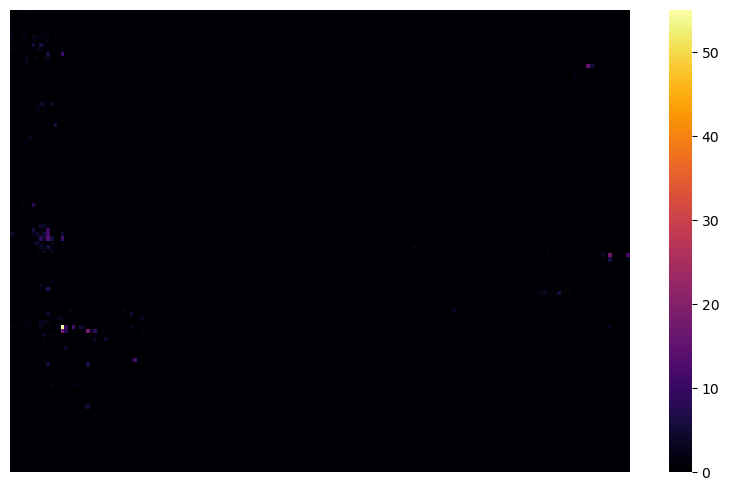

In [34]:
# Create a 2D heatmap matrix
heatmap, x_edges, y_edges = np.histogram2d(df['screen_x'], df['screen_y'], bins=[screen_width // 10, screen_height // 10])

# Plot heatmap
plt.figure(figsize=(10, 6))  # Adjust based on screen size
sns.heatmap(heatmap.T, cmap='inferno', xticklabels=False, yticklabels=False, cbar=True)

# Remove axis labels
plt.axis("off")

# Save the heatmap as an image
plt.savefig("gaze_heatmap.png", dpi=300, bbox_inches='tight', pad_inches=0)

# Show heatmap
plt.show()

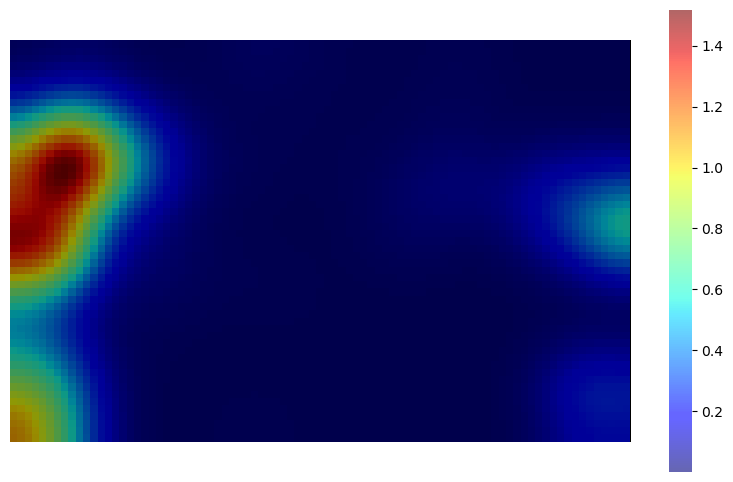

In [80]:
# HEATMAP OVER IMAGE

# Flip Y-axis (Matplotlib uses top-left origin, screen is bottom-left)
df['screen_y'] = screen_height - df['screen_y']

# Create a 2D heatmap matrix with binning
heatmap, x_edges, y_edges = np.histogram2d(df['screen_x'], df['screen_y'], bins=[screen_width // 20, screen_height // 20])

# Apply Gaussian blur for smoother visualization
heatmap = gaussian_filter(heatmap, sigma=5)  # Adjust sigma for more/less blurring

# Load the screenshot
screenshot_path = "test_screenshot.png"
background = cv2.imread(screenshot_path)

# Check if Retina resolution (2x)
expected_width = 1710
expected_height = 1107
screenshot_height, screenshot_width, _ = background.shape

if screenshot_width == expected_width * 2 and screenshot_height == expected_height * 2:
    # Downscale Retina screenshot to match logical resolution
    background = cv2.resize(background, (expected_width, expected_height), interpolation=cv2.INTER_AREA)

# Convert BGR (OpenCV) to RGB (Matplotlib)
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)

# Now proceed with heatmap overlay
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(background, extent=[0, expected_width, 0, expected_height])  # Set background image

sns.heatmap(heatmap.T, cmap="jet", alpha=0.6, xticklabels=False, yticklabels=False, cbar=True)
heatmap_resized = cv2.resize(heatmap, (background.shape[1], background.shape[0]), interpolation=cv2.INTER_CUBIC)

plt.axis("off")
plt.savefig("gaze_heatmap_overlay.png", dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()

In [68]:
print("Background image size:", background.shape)
print("Heatmap size:", heatmap.shape)

Background image size: (1107, 1710, 3)
Heatmap size: (85, 55)


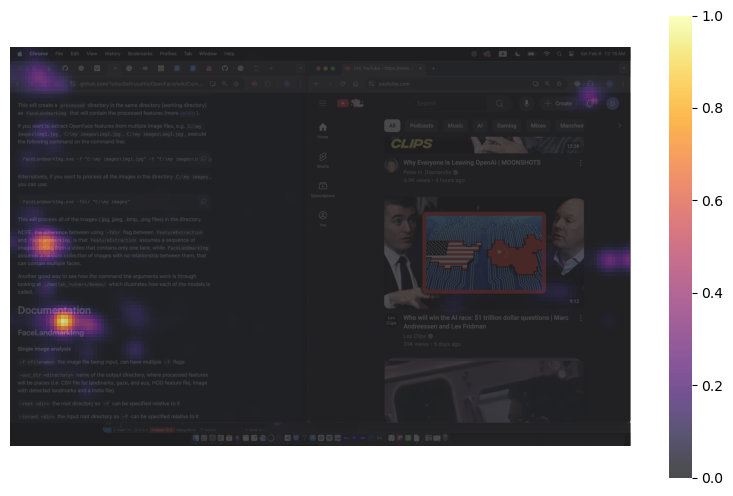

In [92]:
screenshot_path = "test_screenshot.png"
background = cv2.imread(screenshot_path)
expected_width = 1710
expected_height = 1107

# Downscale Retina screenshot if needed
screenshot_height, screenshot_width, _ = background.shape
if screenshot_width == expected_width * 2 and screenshot_height == expected_height * 2:
    background = cv2.resize(background, (expected_width, expected_height), 
                          interpolation=cv2.INTER_AREA)
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)

# Flip the background image both horizontally and vertically
background = np.flip(background, axis=0)  # Vertical flip

# Create a 2D heatmap matrix with your working settings
heatmap, x_edges, y_edges = np.histogram2d(
    df['screen_x'], 
    df['screen_y'], 
    bins=[screen_width // 10, screen_height // 10]
)

# Apply Gaussian blur to smooth the heatmap
heatmap = gaussian_filter(heatmap, sigma=2)

# Normalize heatmap to make it more visible
heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the background with proper extent
ax.imshow(
    background,
    extent=[0, heatmap.shape[0], 0, heatmap.shape[1]],
    alpha=0.6
)

# Overlay the heatmap
sns.heatmap(
    heatmap.T,
    cmap='inferno',
    alpha=0.7,
    xticklabels=False,
    yticklabels=False,
    cbar=True,
    ax=ax
)

# Remove axis labels
plt.axis("off")

# Save the combined visualization
plt.savefig(
    "gaze_heatmap_overlay.png", 
    dpi=300, 
    bbox_inches='tight', 
    pad_inches=0
)

plt.show()